# 數據背景
＃＃　自行車共享系統是新一代的傳統自行車租賃，從會員，租賃和退貨的整個過程已經變得自動化。通過這些系統，用戶能夠輕鬆地從特定位置租用自行車並返回到另一個位置。目前，全世界約有500多個自行車共享計劃，其中包括超過50萬輛自行車。今天，由於它們在交通，環境和健康問題中的重要作用，因此對這些系統存在很大興趣。

除了有趣的自行車共享系統的實際應用之外，這些系統產生的數據特徵使它們對研究具有吸引力。與公共汽車或地鐵等其他交通服務相反，旅行，出發和到達位置的持續時間明確記錄在這些系統中。此功能將自行車共享系統轉變為虛擬傳感器網絡，可用於感知城市的移動性。因此，預計通過監測這些數據可以檢測到城市中的大多數重要事件。

此數據集包含租用自行車歲之間的每小時和每天數2011和2012在資本bikeshare系統在華盛頓特區與相應的天氣和季節的信息。　
https://www.kaggle.com/marklvl/bike-sharing-dataset

華盛頓特區共享單⾞資料集，分析並建⽴預測共享單⾞ 華盛頓特區共享單⾞資料集，分析並建⽴預測共享單⾞ 使⽤⼈數的迴歸模型 使⽤⼈數的迴歸模型

下載資料及說明請到 
當中有 hour.csv 及 day.csv 兩個檔案，可以隨意使⽤ 預測 registered 欄位，但不可使⽤ cnt 欄位作為特徵


## 数据中各列标题如下：

### datetime时间 - 格式：年月日小时
### season季节 - 1 = spring春天, 2 = summer夏天, 3 = fall秋天, 4 = winter冬天
### holiday节假日 - 0：否，1：是
### workingday工作日 - 该天既不是周末也不是假日（0：否，1：是）
### weather天气 - 1:晴天，2:阴天 ，3:小雨或小雪 ，4:恶劣天气（大雨、冰雹、暴风雨或者大雪）
### temp实际温度 - 摄氏度
### atemp体感温度 - 摄氏度
### humidity湿度 - 相对湿度
### windspeed风速 - 风速
### casual - 未注册用户租车数量
### registered - 注册用户租车数量
### count - 总租车数量


# 導入函式庫


In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score


# 讀取數據

In [90]:
data = pd.read_csv("hour.csv")#讀取數據到data中
data 




,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


731筆數據*16個特徵 

# 基本訊息資料

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.2+ MB


### 各属性的统计特性；数据集731；共16列（数值型数據）；無空值

# 探索數據

In [92]:
data.describe() 

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## 得到各屬性的樣本數目、均值、標准差、最小值、1/4分位數（25%）、中位數（50%）、3/4分位數（75%）、最大值 可初步了解各特徵的分布 

# 單變量分析

C:\Users\strive72\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


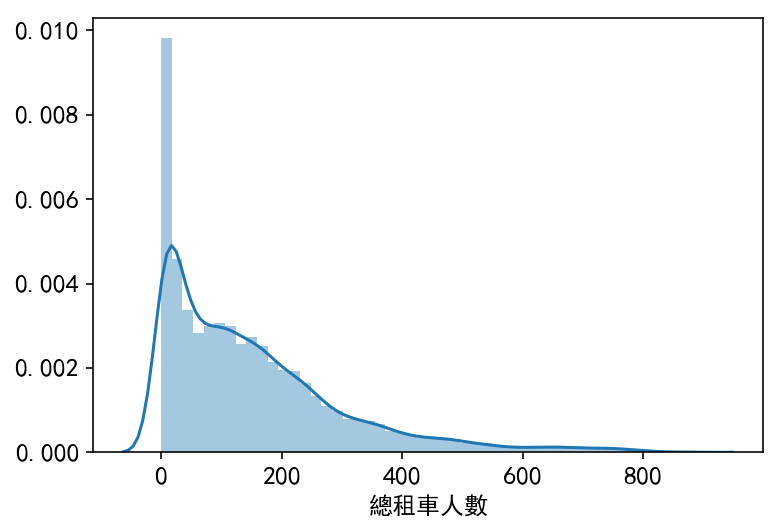

In [93]:
# 目标y（总租车人数registered）的直方图／分布

#  解决中文乱码;
plt.rc('font', family='SimHei', size=13)
# 创建一个新图形
fig = plt.figure()
# 灵活的单变量分布的曲线图
# data.cnt.values：观察数据。如果这一系列目标的属性的名称，该名称将用于标签的数据；
# bins:直方图中箱子个数
# kda：是否为高斯核密度估计
sns.distplot(data.registered.values, bins=50, kde=True)
# 设置当前轴的x轴标签
plt.xlabel('總租車人數', fontsize=12)
# 展示生成的图形
plt.show()
# 观测一下数据还算符合常态分布


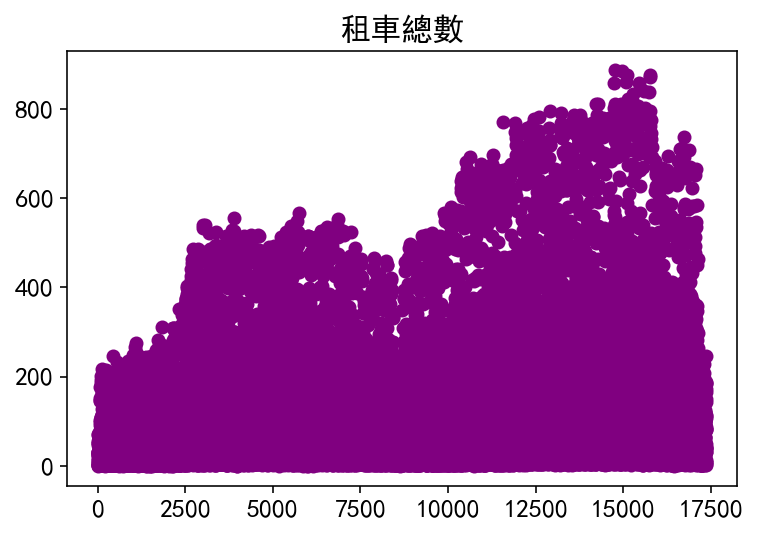

In [94]:
# 单个特征散点图
# 散点图中的x与y不同大小和/或颜色标记
# 1.range(data.shape[0])：数据位置
# 2.data["registered"].values:
plt.scatter(range(data.shape[0]), data["registered"].values,color='purple')
# 解决中文乱码;
plt.rc('font', family='SimHei', size=13)

plt.title("租車總數");


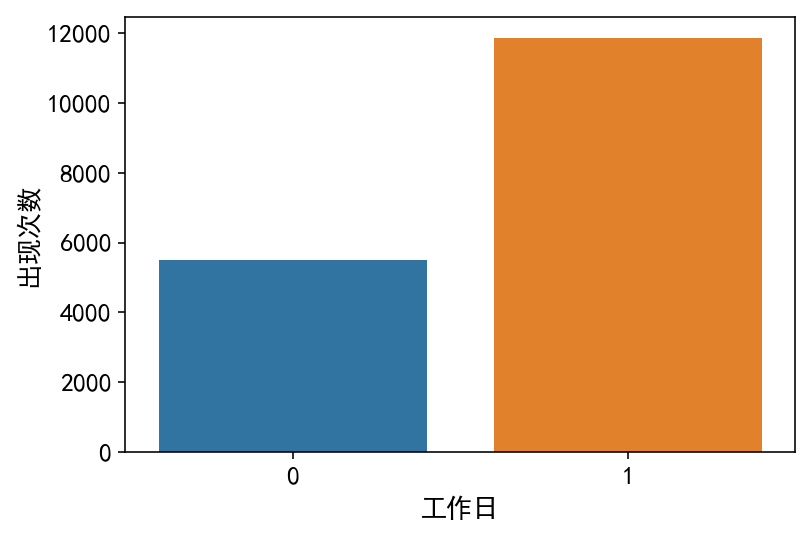

In [95]:
#直方图 不連續
fig = plt.figure()  
#工作日
sns.countplot(data.workingday.values, order=[0, 1]);
#解决中文乱码;
plt.rc('font', family='SimHei', size=13)
plt.xlabel('工作日');
plt.ylabel('出现次数');


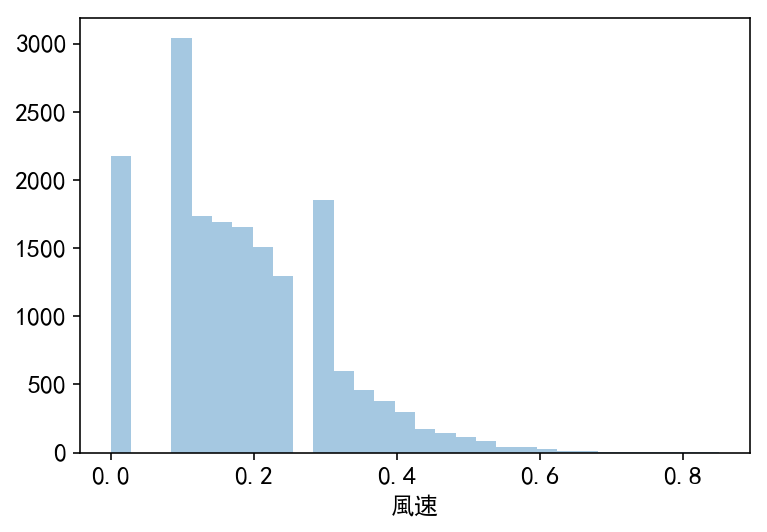

In [96]:
#直方圖連續
fig = plt.figure()
#風速
sns.distplot(data.windspeed.values, bins=30, kde=False)
#解决中文亂碼;
plt.rc('font', family='SimHei', size=13)
plt.xlabel('風速', fontsize=12)
plt.show()


## 倆倆特徵相關性

In [97]:
#获得所有需要的列值
cols=data.columns 
#cols=data[["holiday","workingday","weathersit","temp","atemp","hum","windspeed","cnt"]]
#data=data[["holiday","workingday","weathersit","temp","atemp","hum","windspeed","cnt"]]
# Calculates pearson co-efficient for all combinations，通常认为相关系数大于0.5的为强相关
data_corr = data.corr().abs()  


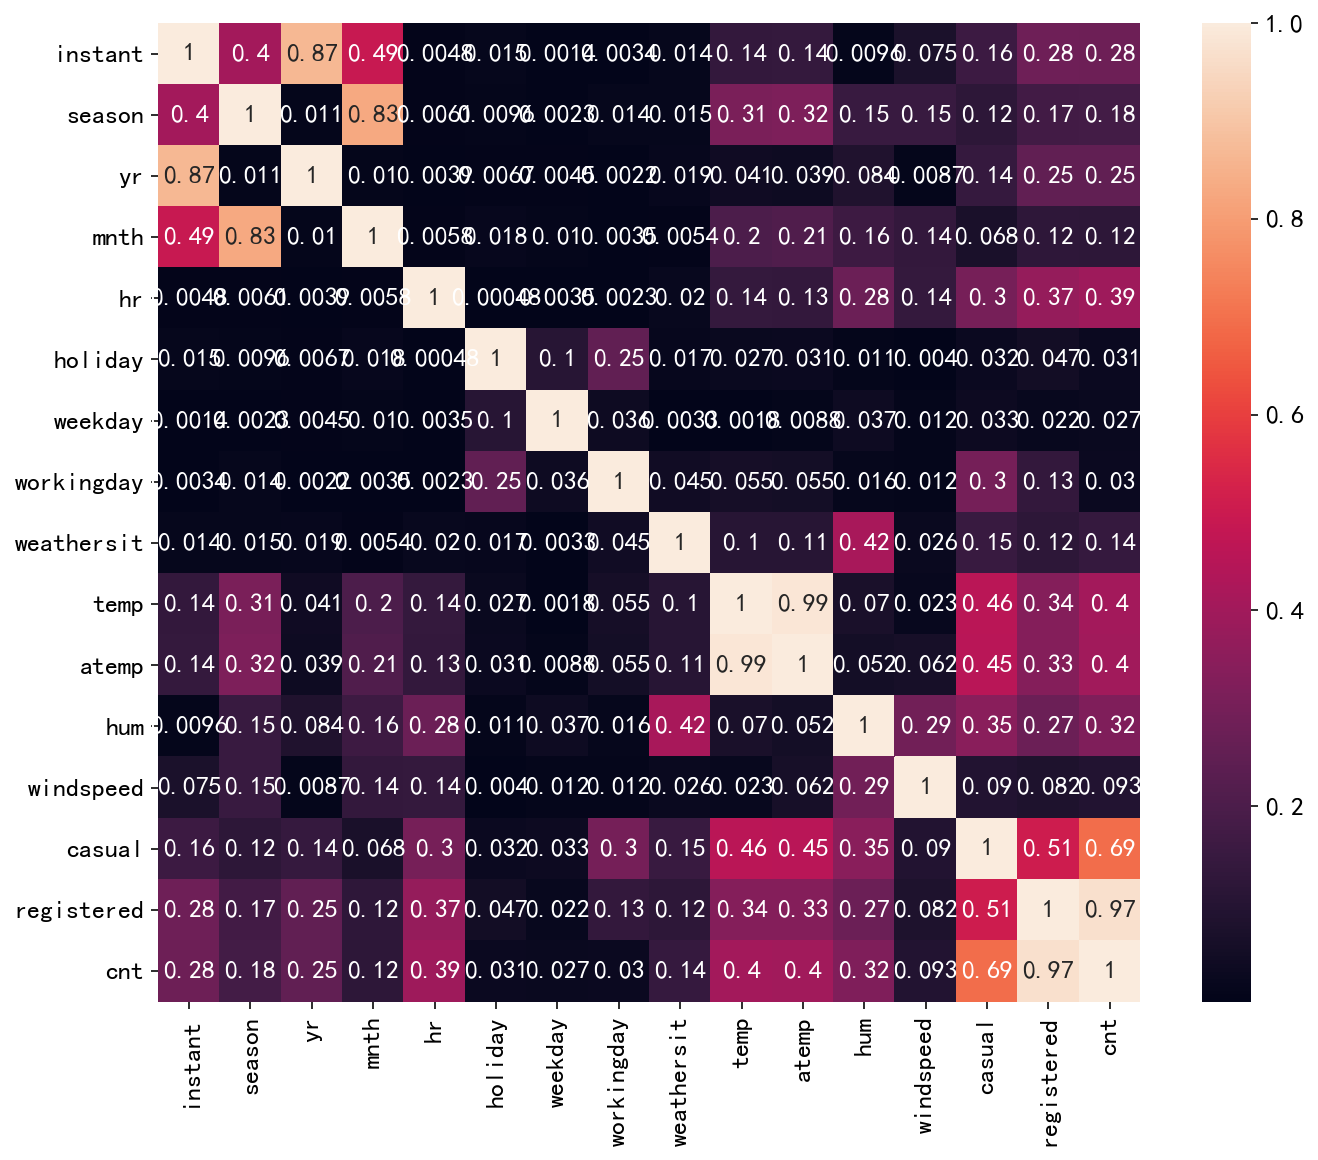

In [98]:
#熱力圖
plt.subplots(figsize=(11, 9))
sns.heatmap(data_corr,annot=True)
# Mask unimportant features
sns.heatmap(data_corr, mask=data_corr < 2, cbar=False)

plt.savefig('day_coor.png' )
plt.show()


## 用程式找高相關屬性

In [99]:
#设置阈值只选择高度相关的属性
threshold = 0.5
# 成对与以上阈值相关的列表 
corr_list = []
#size = data.shape[1]
size = data_corr.shape[0]

#搜索高相关对 
for i in range(0, size): #特性的数量
    for j in range(i+1,size): #避免重复
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #存储相关性和列索引 
#首先显示高级的     
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))
#打印相关性和列名 
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))


weathersit and temp = 0.99
casual and registered = 0.97
instant and season = 0.87
dteday and yr = 0.83
windspeed and registered = 0.69
windspeed and casual = 0.51


## 高相關屬性圖解

C:\Users\strive72\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


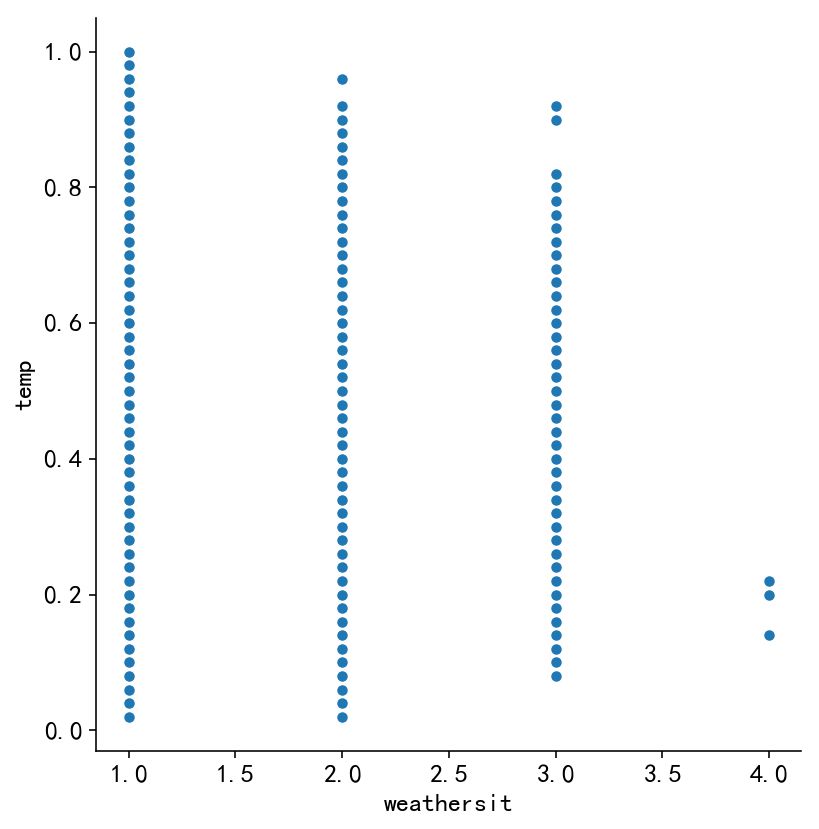

C:\Users\strive72\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


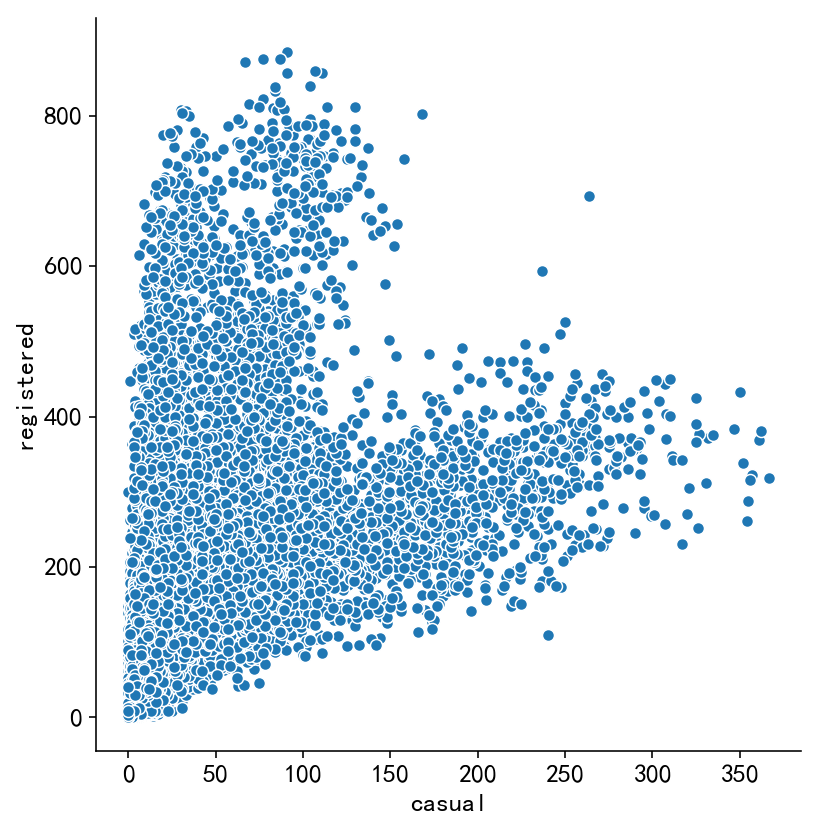

C:\Users\strive72\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


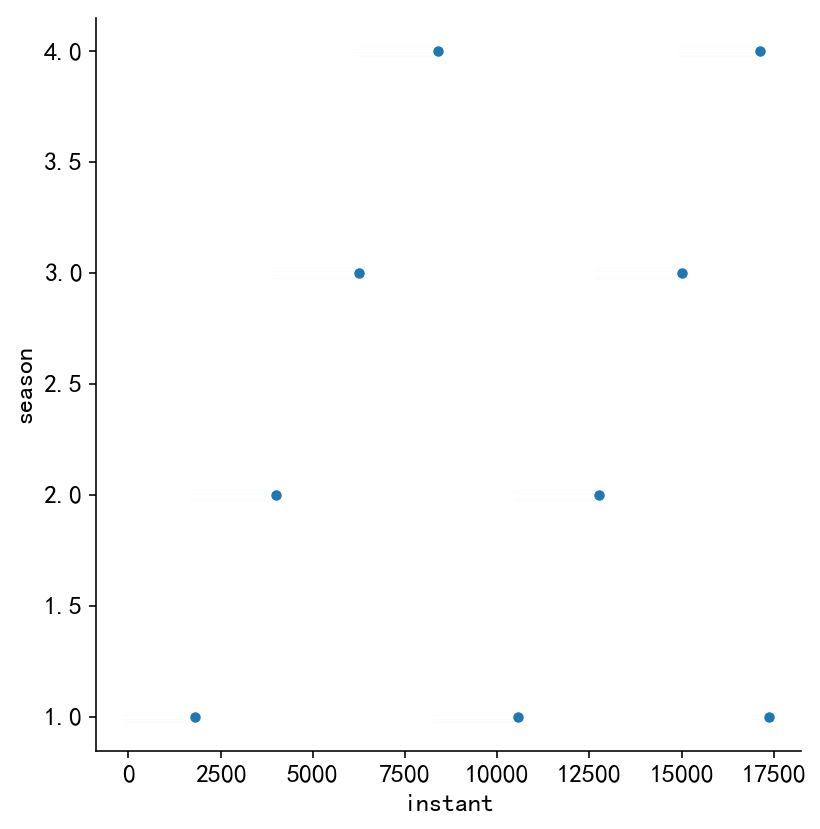

C:\Users\strive72\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


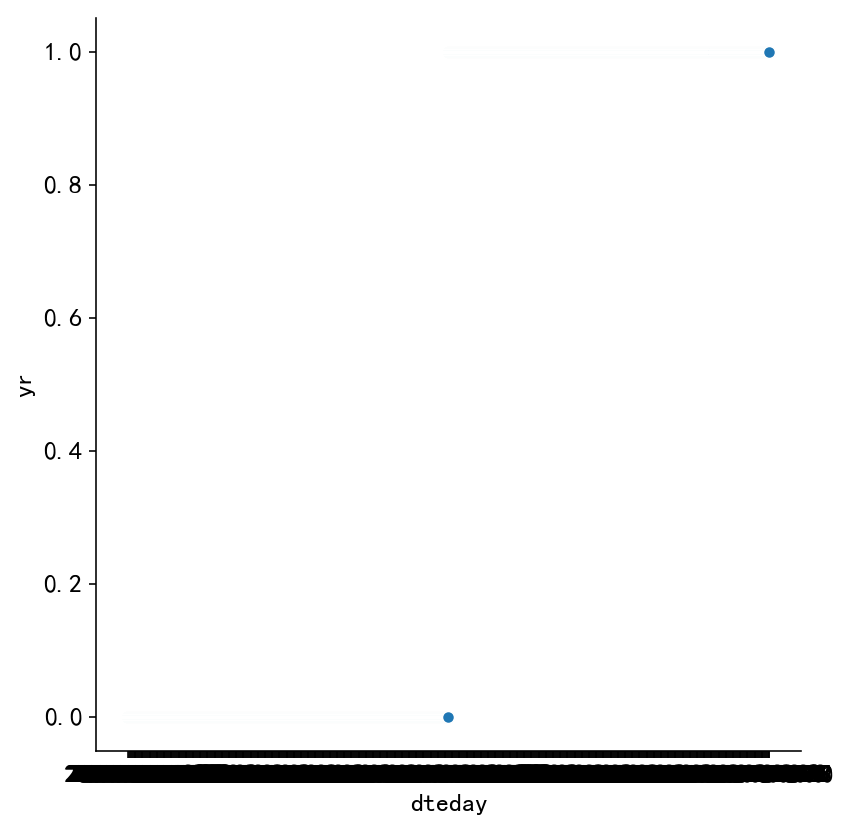

C:\Users\strive72\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


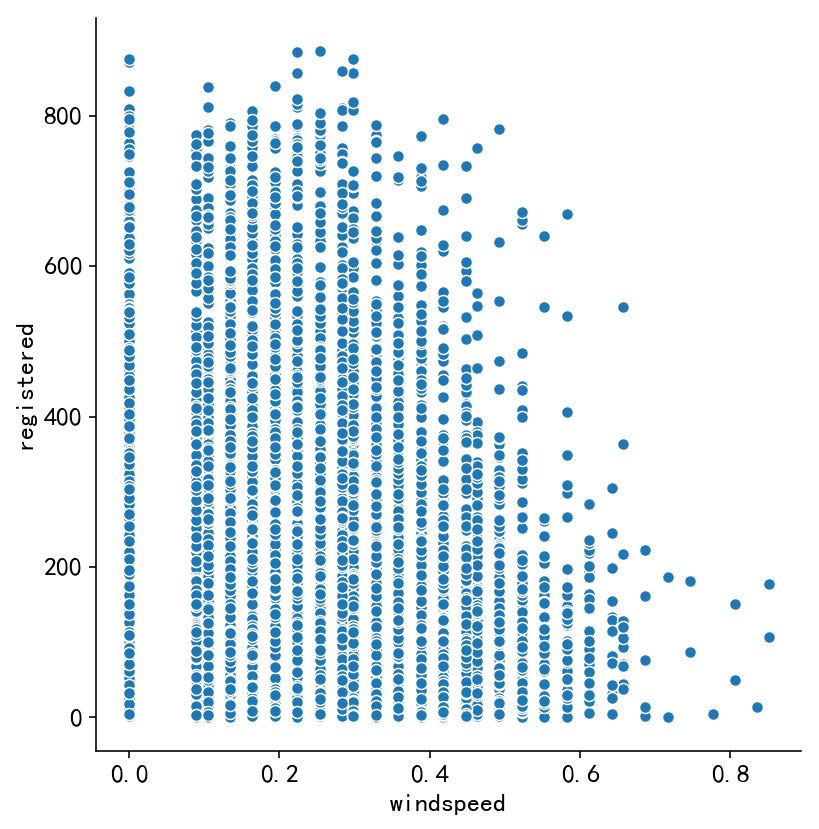

C:\Users\strive72\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


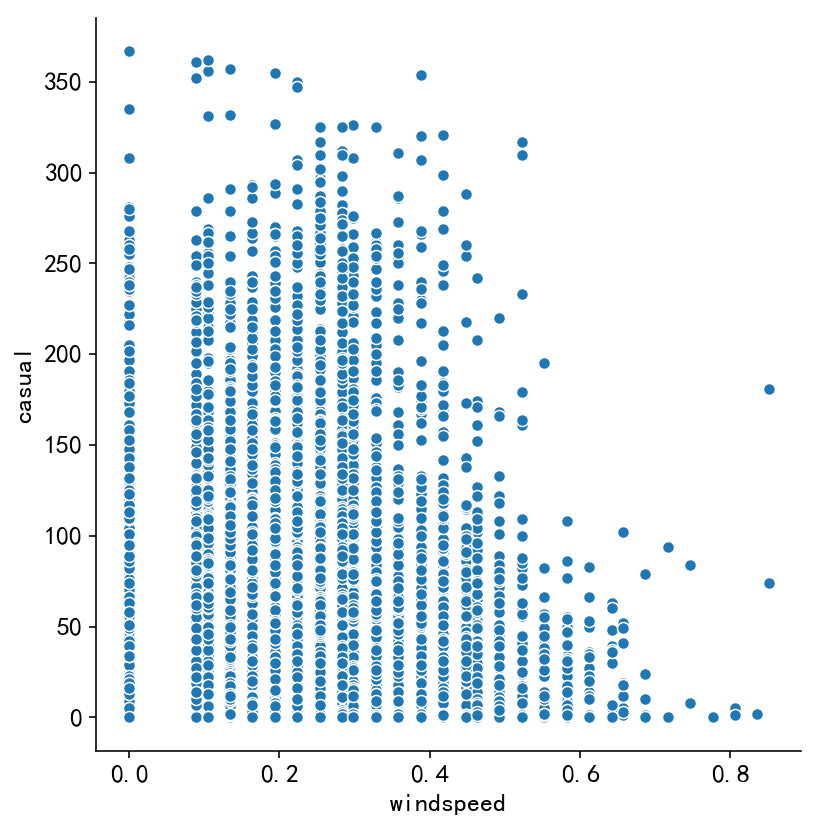

In [100]:
# 仅高相关对的散射图
for v,i,j in s_corr_list:
    sns.pairplot(data, size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

In [101]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn import metrics


In [104]:
x = dataset.iloc[:,:11]
y = dataset.iloc[:,11]
#x
#y
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.5,random_state=555)
train = X_train.join(y_train)
test = X_test.join(y_test)

In [105]:
svm_rbf = svm.SVC(kernel='rbf', probability=True, gamma='auto', random_state=555)
model = svm_rbf.fit(X_train,y_train)
score = model.score(X_train,np.array(y_train))
print('traning_score=', score)

ValueError: could not convert string to float: '2012-02-15'

In [ ]:
predict_y_train = model.predict(X_train)
accuracy = metrics.accuracy_score(predict_y_train, np.array(y_train))
precision = metrics.precision_score(predict_y_train, np.array(y_train), average='weighted')
recall = metrics.recall_score(predict_y_train, np.array(y_train), average='weighted')
print('traning_accuracy_score =', accuracy )
print('traning_precision_score =', precision )
print('traning_recall_score =', recall )

In [ ]:
svm_rbf = svm.SVC(kernel='rbf', probability=True, gamma='auto', random_state=555)
model = svm_rbf.fit(X_test,y_test)
score = model.score(X_test,np.array(y_test))
print('test_score=', score)

In [ ]:
predict_y_test = model.predict(X_test)
accuracy = metrics.accuracy_score(predict_y_test, np.array(y_test))
precision = metrics.precision_score(predict_y_test, np.array(y_test), average='weighted')
recall = metrics.recall_score(predict_y_test, np.array(y_test), average='weighted')
print('traning_accuracy_score =', accuracy )
print('traning_precision_score =', precision )
print('traning_recall_score =', recall )

In [ ]:
sns.regplot(x=predict_y, y=y_train, fit_reg=True)

In [ ]:
model.score(X_train, y_train)

# 結論 此实例存在问题： 
1）normalize是标准化，另外你这里分别对训练和测试数据标准化是有问题的。分别处理会导致数据分布变得不一样。 
2）数据特征工程做的少，类别型特征没有处理。 
3）模型跑出来之后，完全没有结果的解析